In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data from x_dir, stop after loading fn_max files
# Returns X, Y, Dir
# X - independent variables
# Y - dependend variables (x-, y-, z- of the vertex in this implementation)
# Dir - direction vector (x-, y-, z- componenets), could be made dependent variable
def load_test_data_to_memory(x_dir, fn_max=2000) :
    X, Y, Dir = np.array([]), np.array([]), np.array([])
    f_list = os.listdir(x_dir)
    f_list.sort()
    i=0
    for x in f_list :
        batch_data = np.load(os.path.join(x_dir, x))
        
        X = np.vstack([X, np.array(batch_data['x'])]) if X.size else np.array(batch_data['x'])
        Y = np.vstack([Y, np.array(batch_data['y_vtx'])]) if Y.size else np.array(batch_data['y_vtx'])
        Dir = np.vstack([Dir, np.array(batch_data['y_dir'])]) if Dir.size else np.array(batch_data['y_dir'])

        i+=1
        if i%10 == 0:
            print(x)
            print('i = ', i, '   ', X.shape, '   ', Y.shape, '   ', Dir.shape)
        if i>=fn_max:
            break
    print(X.shape, '   ', Y.shape, '   ', Dir.shape)
    return X, Y, Dir

In [3]:
X, vtx1, dir1 = load_test_data_to_memory('/data/Elagin/data_vtx_dir_1el_test_norm',50)
print(X.shape)
print(vtx1.shape)
print(dir1.shape)

(9000, 6300)     (9000, 3)     (9000, 3)
(9000, 6300)
(9000, 3)
(9000, 3)


In [5]:
X[0:20,2]

array([0.00041634, 0.        , 0.00331483, 0.00213947, 0.        ,
       0.00261099, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [6]:
theta = X[:,0::3].flatten()
phi = X[:,1::3].flatten()
time = X[:,2::3].flatten()
X = []

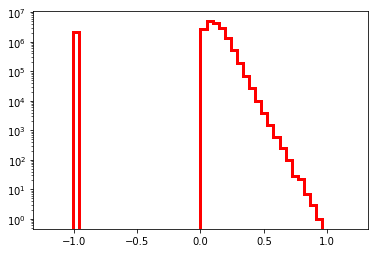

-0.005831324499210999
t_min =  -1.0    t_max =  0.9400573603312175


In [7]:
plt.hist(time, bins=50, range=(-1.2,1.2), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'r')
plt.yscale('log')
plt.show()
print(np.mean(time))
print('t_min = ', np.min(time), '   t_max = ', np.max(time))

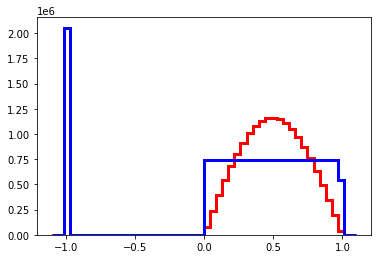

theta_min =  -1.0    theta_max =  0.9998041353086622    theta_mean =  0.3358735294146783
phi_min =  -1.0    phi_max =  0.9999999259511271    phi_mean =  0.3369297150869582


In [8]:
plt.hist(theta, bins=50, range=(-1.1, 1.1), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'r')
plt.hist(phi, bins=50, range=(-1.1, 1.1), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'b')
plt.show()
print('theta_min = ', np.min(theta), '   theta_max = ', np.max(theta), '   theta_mean = ', np.mean(theta) )
print('phi_min = ', np.min(phi), '   phi_max = ', np.max(phi), '   phi_mean = ', np.mean(phi) )

9000
94.86832980505137
mean_vtx_x =  0.4293926010719695    sem_vtx_x =  1.416010036510673    rms_vtx_x =  134.33519341370106
mean_vtx_y =  -0.6453086455543802    sem_vtx_y =  1.41108165856487    rms_vtx_y =  133.86851551986254
mean_vtx_z =  2.3591282301774763    sem_vtx_z =  1.404158510718172    rms_vtx_z =  133.2310609242713


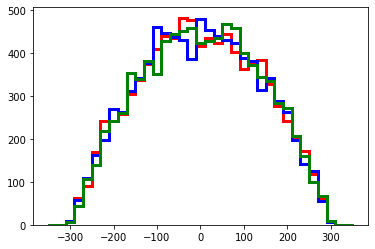

In [9]:
print(vtx1.shape[0])
sqrt_n = np.sqrt(vtx1.shape[0])
print(sqrt_n)
plt.hist(vtx1[:,0], bins=35, range=(-350,350), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'r')
plt.hist(vtx1[:,1], bins=35, range=(-350,350), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'b')
plt.hist(vtx1[:,2], bins=35, range=(-350,350), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'g')
print('mean_vtx_x = ',np.mean(vtx1[:,0]), '   sem_vtx_x = ',np.std(vtx1[:,0])/sqrt_n, '   rms_vtx_x = ',np.sqrt(np.mean(np.square(vtx1[:,0]))) )
print('mean_vtx_y = ',np.mean(vtx1[:,1]), '   sem_vtx_y = ',np.std(vtx1[:,1])/sqrt_n, '   rms_vtx_y = ',np.sqrt(np.mean(np.square(vtx1[:,1]))) )
print('mean_vtx_z = ',np.mean(vtx1[:,2]), '   sem_vtx_z = ',np.std(vtx1[:,2])/sqrt_n, '   rms_vtx_z = ',np.sqrt(np.mean(np.square(vtx1[:,2]))) )

9000
94.86832980505137
mean_dir_x =  -0.007264888721299243    sem_dir_x =  0.006106679537474615    rms_dir_x =  0.5793760379657009
mean_dir_y =  0.0019328721847240082    sem_dir_y =  0.006061494731017298    rms_dir_y =  0.5750471296878514
mean_dir_z =  -0.006245012613573604    sem_dir_z =  0.0060882875268500995    rms_dir_z =  0.5776194294420248


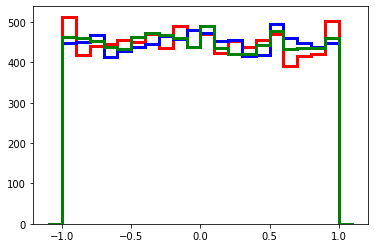

In [10]:
print(dir1.shape[0])
sqrt_n = np.sqrt(vtx1.shape[0])
print(sqrt_n)
plt.hist(dir1[:,0], bins=22, range=(-1.1,1.1), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'r')
plt.hist(dir1[:,1], bins=22, range=(-1.1,1.1), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'b')
plt.hist(dir1[:,2], bins=22, range=(-1.1,1.1), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'g')
print('mean_dir_x = ',np.mean(dir1[:,0]), '   sem_dir_x = ',np.std(dir1[:,0])/sqrt_n, '   rms_dir_x = ',np.sqrt(np.mean(np.square(dir1[:,0]))) )
print('mean_dir_y = ',np.mean(dir1[:,1]), '   sem_dir_y = ',np.std(dir1[:,1])/sqrt_n, '   rms_dir_y = ',np.sqrt(np.mean(np.square(dir1[:,1]))) )
print('mean_dir_z = ',np.mean(dir1[:,2]), '   sem_dir_z = ',np.std(dir1[:,2])/sqrt_n, '   rms_dir_z = ',np.sqrt(np.mean(np.square(dir1[:,2]))) )

In [11]:
Rvtx1 = np.sqrt(vtx1[:,0]*vtx1[:,0] + vtx1[:,1]*vtx1[:,1] + vtx1[:,2]*vtx1[:,2]) # calculating length of each vertex point vectors
Rvtx1.shape

(9000,)

In [12]:
Rvtx1 = Rvtx1.reshape(Rvtx1.shape[0],1) # reshaping for matrix division
Rvtx1.shape

(9000, 1)

In [13]:
vtx1 = vtx1/Rvtx1 # normalizing vertex point vectors
vtx_dot_dir = np.sum(vtx1*dir1, axis=1) # row-wise dot product

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 442.,
        453., 453., 448., 476., 413., 428., 425., 435., 428., 459., 475.,
        481., 449., 461., 450., 454., 417., 495., 458.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
         0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
         1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 [<matplotlib.patches.Polygon at 0x7fdc8b4b03a0>])

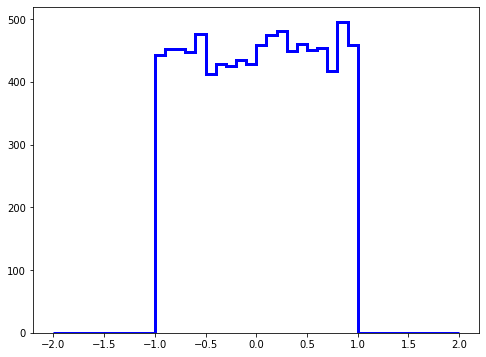

In [14]:
plt.figure(figsize=[8,6])
plt.hist(vtx_dot_dir, bins=40, range=(-2,2), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'b')

In [65]:
np.std(vtx1[:,0]) - np.sqrt(np.mean(np.square(vtx1[:,0])))
np.std(vtx1[:,0], ddof=1)

134.25331932004127

In [66]:
np.std(vtx1[:,0])

134.25309556432262

In [67]:
np.sqrt(np.mean(np.square(vtx1[:,0])))

134.25310408901424